In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("penguins_lter.csv")

In [2]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:

def clean_data(df):
    # Replace missing values with the median of each column in: 'Culmen Length (mm)', 'Culmen Depth (mm)' and 2 other columns
    df = df.fillna({'Culmen Length (mm)': df['Culmen Length (mm)'].median(), 'Culmen Depth (mm)': df['Culmen Depth (mm)'].median(), 'Flipper Length (mm)': df['Flipper Length (mm)'].median(), 'Body Mass (g)': df['Body Mass (g)'].median()})
    # Replace missing values with the mode of each column in: 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
    df = df.fillna({'Delta 15 N (o/oo)': df['Delta 15 N (o/oo)'].mode()[0], 'Delta 13 C (o/oo)': df['Delta 13 C (o/oo)'].mode()[0]})
    # Replace gaps forward from the previous valid value in: 'Sex'
    df = df.fillna({'Sex': df['Sex'].ffill()})
    # Replace all instances of "." with "FEMALE" in column: 'Sex'
    df['Sex'] = df['Sex'].str.replace(".", "FEMALE", case=False, regex=False)
    return df

df = clean_data(df.copy())
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10,18.7,181.0,3750.0,MALE,7.63220,-27.01854,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,44.45,17.3,197.0,4050.0,FEMALE,7.63220,-27.01854,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


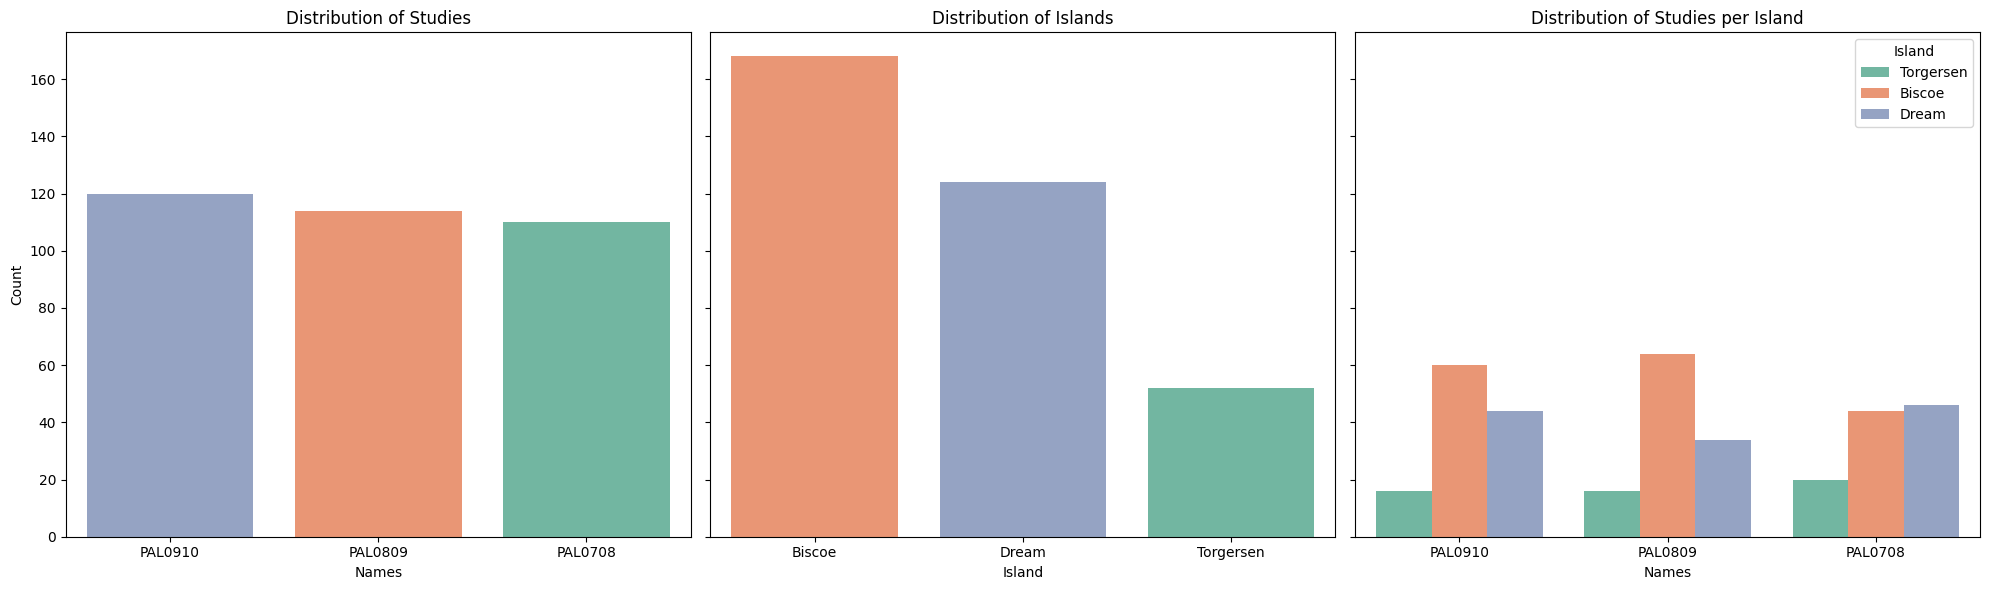

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  
# Chart 1: Study Distribution
sns.countplot(
    x='studyName', 
    data=df, 
    order=df['studyName'].value_counts().index,
    palette="Set2",
    hue='studyName',
    ax=axes[0],
    legend=False
)
axes[0].set_title('Distribution of Studies')
axes[0].set_xlabel('Names')
axes[0].set_ylabel('Count')

# Chart 2: Distribution of Islands
sns.countplot(
    x='Island', 
    data=df, 
    order=df['Island'].value_counts().index,
    palette='Set2',
    hue='Island',
    ax=axes[1] 
)
axes[1].set_title('Distribution of Islands')
axes[1].set_xlabel('Island')
axes[1].set_ylabel('')

# Chart 3: Distribution of Studies per Island
sns.countplot(
    x='studyName', 
    data=df, 
    order=df['studyName'].value_counts().index,
    palette="Set2",
    hue='Island',
    ax=axes[2] 
)
axes[2].set_title('Distribution of Studies per Island')
axes[2].set_xlabel('Names')
axes[2].set_ylabel('')
axes[2].legend(title='Island', loc='upper right')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


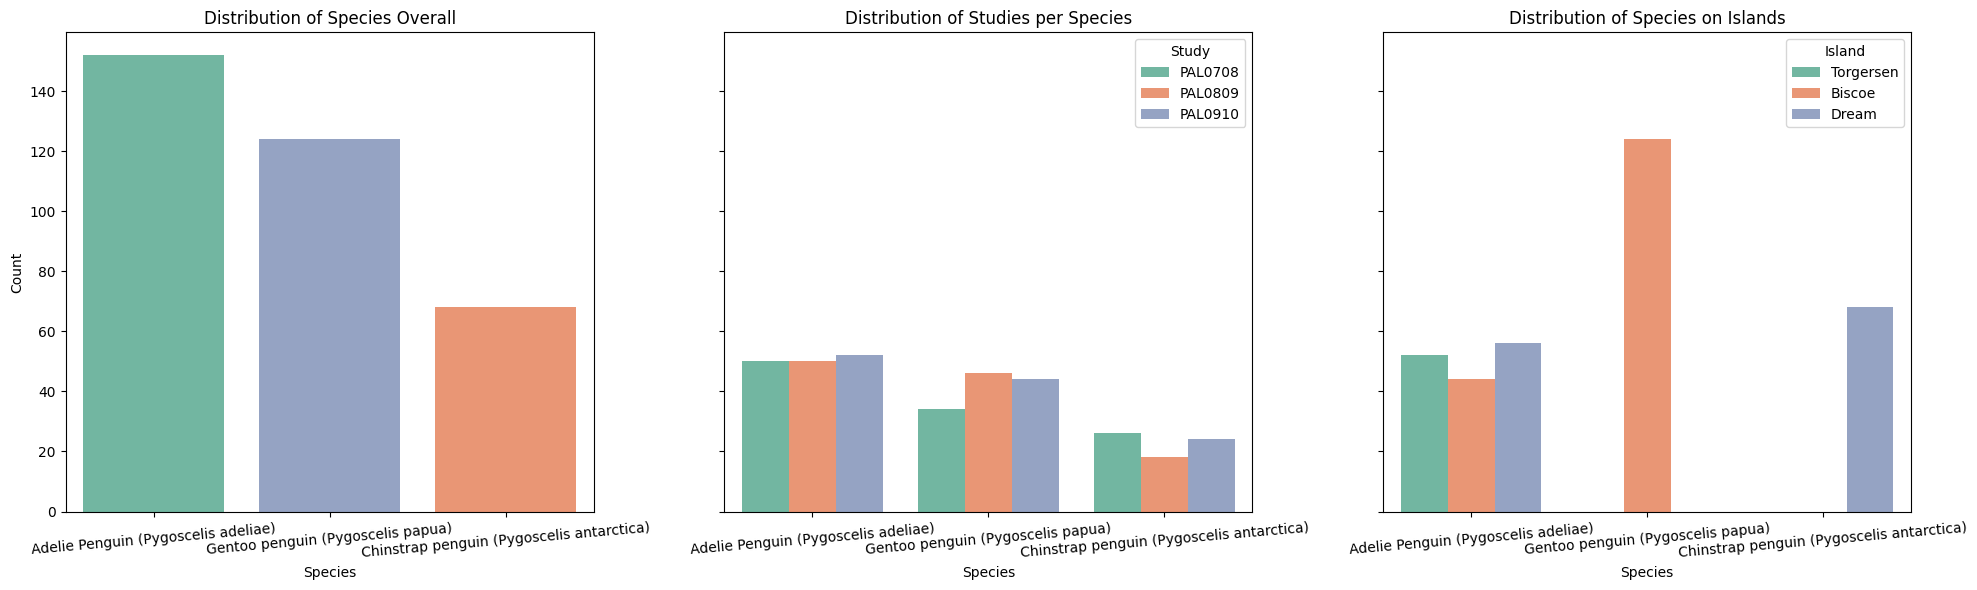

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True) 

# Chart 1: Distribution of Species Overall
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='Species',
    ax=axes[0]  
)
axes[0].set_title('Distribution of Species Overall')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=5)

# Chart 2: Distribution of Species per Study
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='studyName',
    ax=axes[1]  
)
axes[1].set_title('Distribution of Studies per Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=5)
axes[1].legend(title='Study', loc='upper right')

# Chart 3: Distribution of Species per Island
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='Island',
    ax=axes[2]  
)
axes[2].set_title('Distribution of Species on Islands')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=5)
axes[2].legend(title='Island', loc='upper right')

plt.tight_layout()
plt.show()


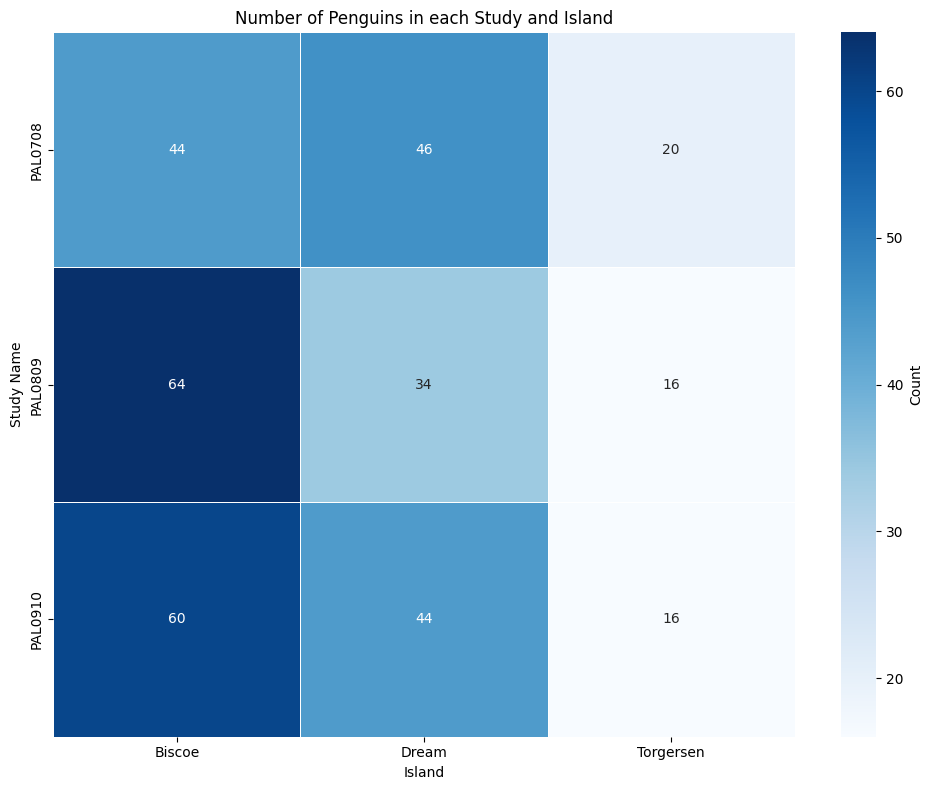

In [6]:
# Number of Penguins in Each Study and Island
heatmap_data = df.groupby(['studyName', 'Island']).size().reset_index(name='counts')
heatmap_pivot = heatmap_data.pivot(index='studyName', columns='Island', values='counts').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_pivot,
    annot=True, 
    fmt='g',     
    cmap='Blues',  
    linewidths=0.5, 
    cbar_kws={'label': 'Count'} 
)
plt.title('Number of Penguins in each Study and Island')
plt.xlabel('Island')
plt.ylabel('Study Name')
plt.tight_layout()
plt.show()

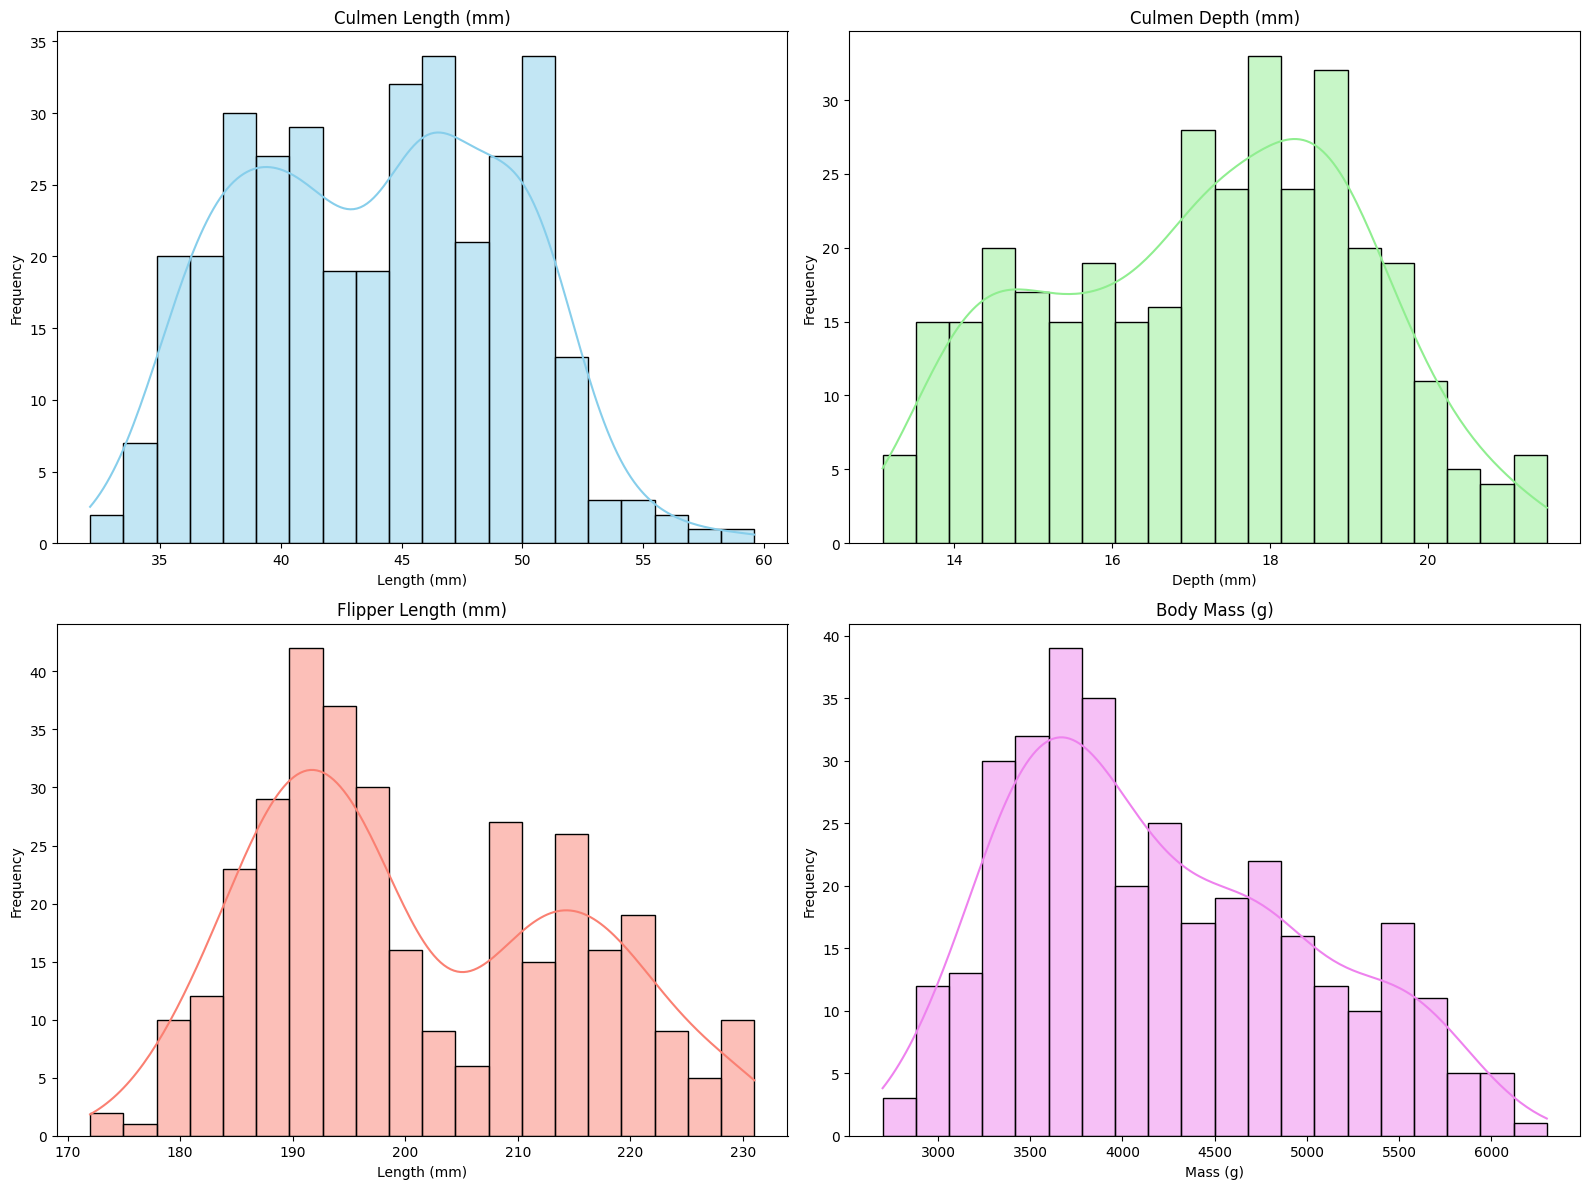

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Histogram 1: Culmen Length
sns.histplot(
    df["Culmen Length (mm)"], 
    bins=20, 
    kde=True,  # Adds the density line
    color="skyblue", 
    ax=axes[0, 0]
)
axes[0, 0].set_title("Culmen Length (mm)")
axes[0, 0].set_xlabel("Length (mm)")
axes[0, 0].set_ylabel("Frequency")

# Histogram 2: Culmen Depth
sns.histplot(
    df["Culmen Depth (mm)"], 
    bins=20, 
    kde=True,  # Adds the density line
    color="lightgreen", 
    ax=axes[0, 1]
)
axes[0, 1].set_title("Culmen Depth (mm)")
axes[0, 1].set_xlabel("Depth (mm)")
axes[0, 1].set_ylabel("Frequency")

# Histogram 3: Flipper Length
sns.histplot(
    df["Flipper Length (mm)"], 
    bins=20, 
    kde=True,  # Adds the density line
    color="salmon", 
    ax=axes[1, 0]
)
axes[1, 0].set_title("Flipper Length (mm)")
axes[1, 0].set_xlabel("Length (mm)")
axes[1, 0].set_ylabel("Frequency")

# Histogram 4: Body Mass
sns.histplot(
    df["Body Mass (g)"], 
    bins=20, 
    kde=True,  # Adds the density line
    color="violet", 
    ax=axes[1, 1]
)
axes[1, 1].set_title("Body Mass (g)")
axes[1, 1].set_xlabel("Mass (g)")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


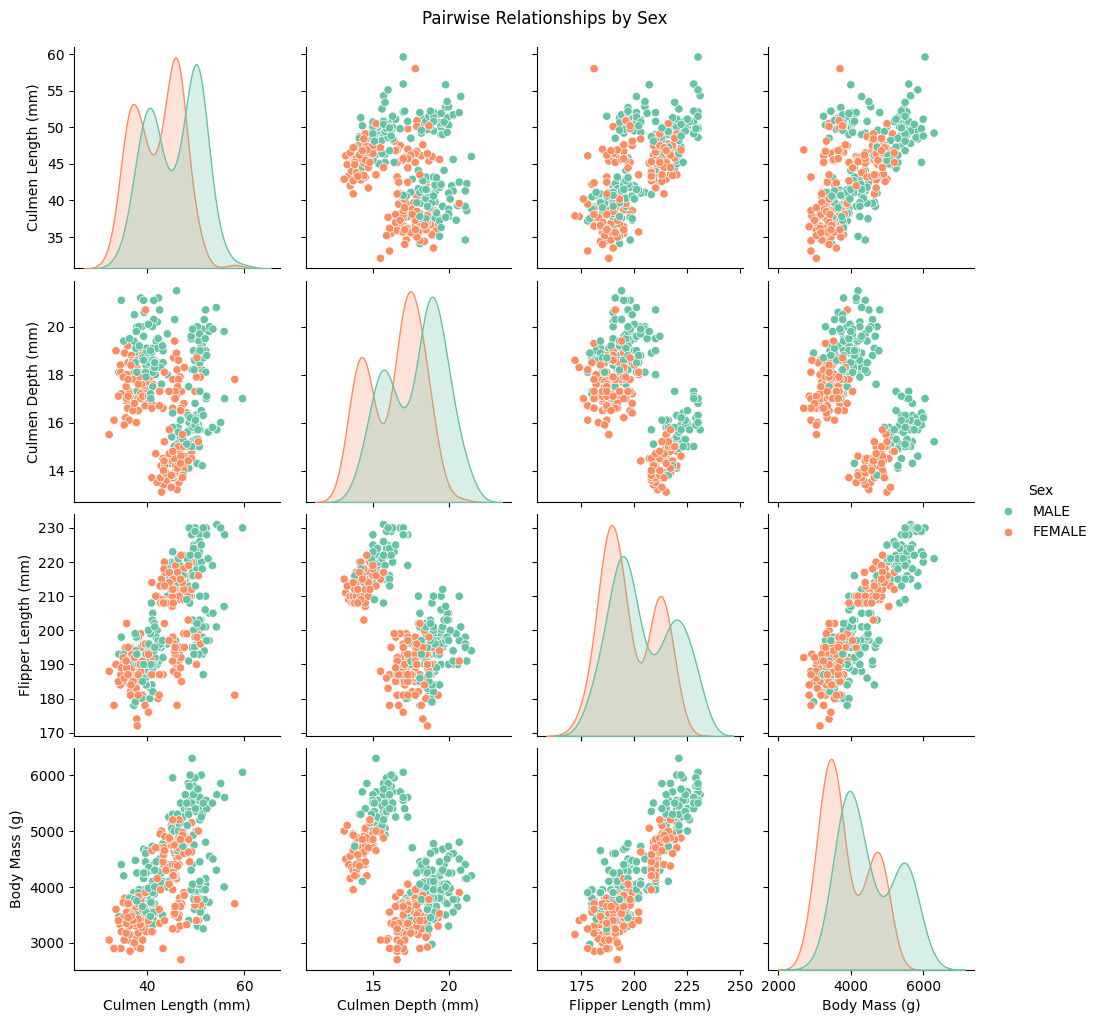

In [8]:
# Pairwaise relationships by sex
sns.pairplot(
    df[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]], 
    hue="Sex", 
    diag_kind="kde", 
    palette="Set2"
)
plt.suptitle("Pairwise Relationships by Sex", y=1.02)
plt.show()



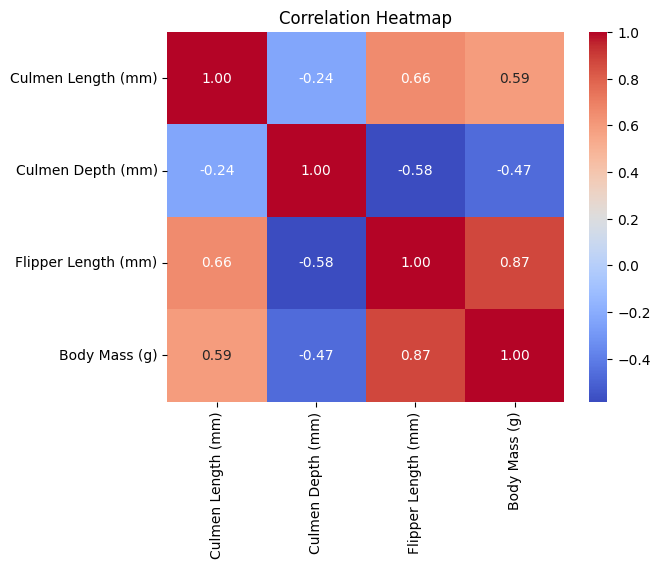

In [9]:
# Correlation heatmap
correlation = df[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

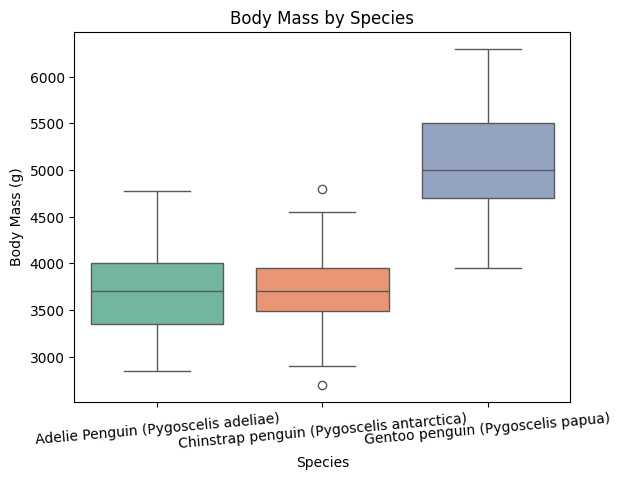

In [10]:
# Body mass by species
sns.boxplot(
    x="Species", 
    y="Body Mass (g)", 
    data=df,
    hue='Species', 
    palette="Set2")
plt.title("Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.tick_params(axis='x', rotation=5)
plt.show()


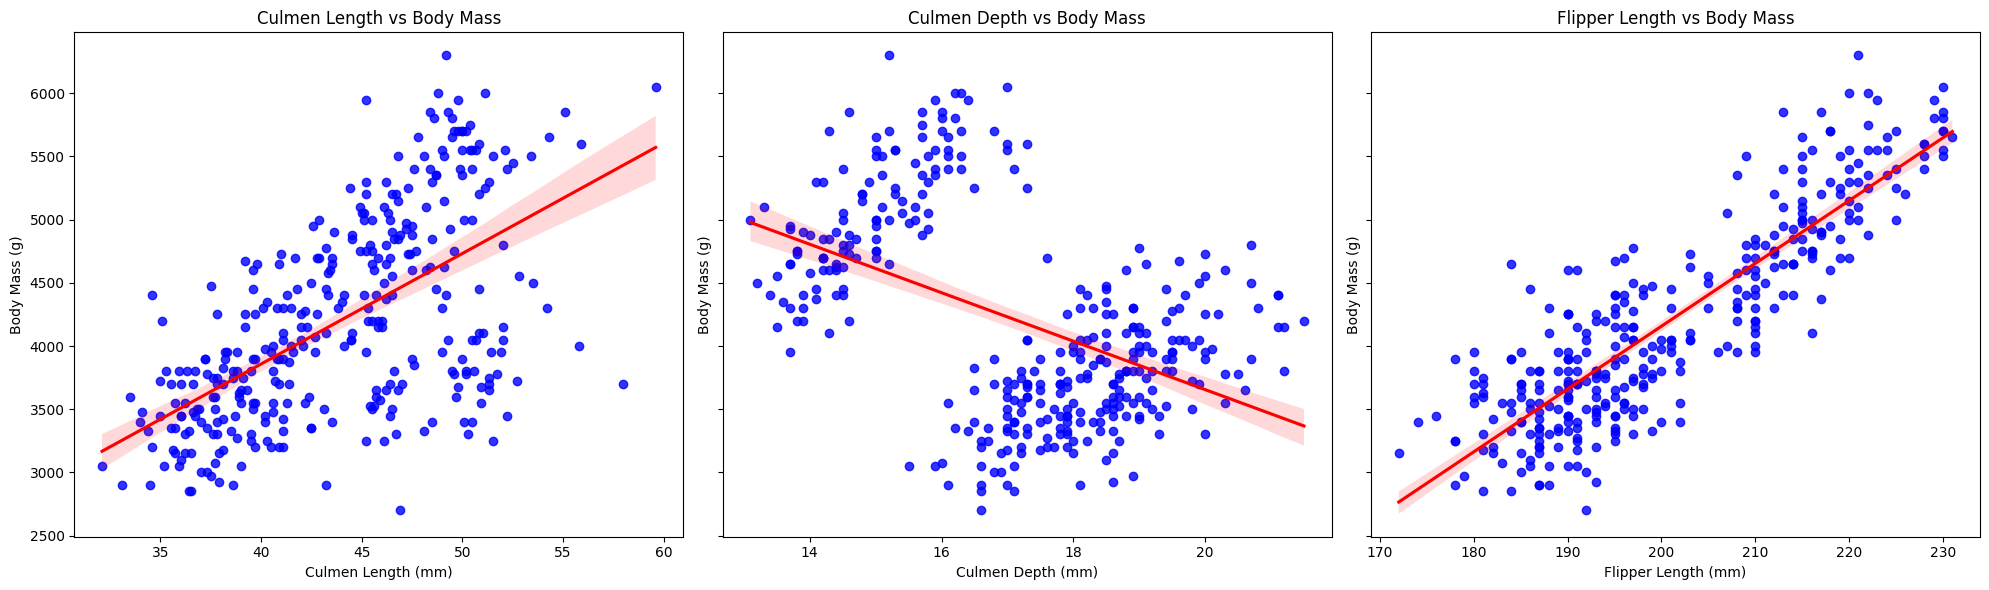

In [11]:
# Regression analysis of culmen depth, length, flipper length vs body mass

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True) 

# Regrssion 1: Culmen Length vs Body Mass
sns.regplot(
    x="Culmen Length (mm)", 
    y="Body Mass (g)", 
    data=df, 
    color="blue", 
    line_kws={"color": "red"},
    ax=axes[0]
)
axes[0].set_title("Culmen Length vs Body Mass")
axes[0].set_xlabel("Culmen Length (mm)")
axes[0].set_ylabel("Body Mass (g)")

# Regrssion 2: Culmen Depth vs Body Mass
sns.regplot(
    x="Culmen Depth (mm)", 
    y="Body Mass (g)", 
    data=df, 
    color="blue", 
    line_kws={"color": "red"},
    ax=axes[1]
)
axes[1].set_title("Culmen Depth vs Body Mass")
axes[1].set_xlabel("Culmen Depth (mm)")
axes[1].set_ylabel("Body Mass (g)")

# Regrssion 3: Flipper Length vs Body Mass
sns.regplot(
    x="Flipper Length (mm)", 
    y="Body Mass (g)", 
    data=df, 
    color="blue", 
    line_kws={"color": "red"},
    ax=axes[2]
)
axes[2].set_title("Flipper Length vs Body Mass")
axes[2].set_xlabel("Flipper Length (mm)")
axes[2].set_ylabel("Body Mass (g)")

# Adjust layout
plt.tight_layout()
plt.show()



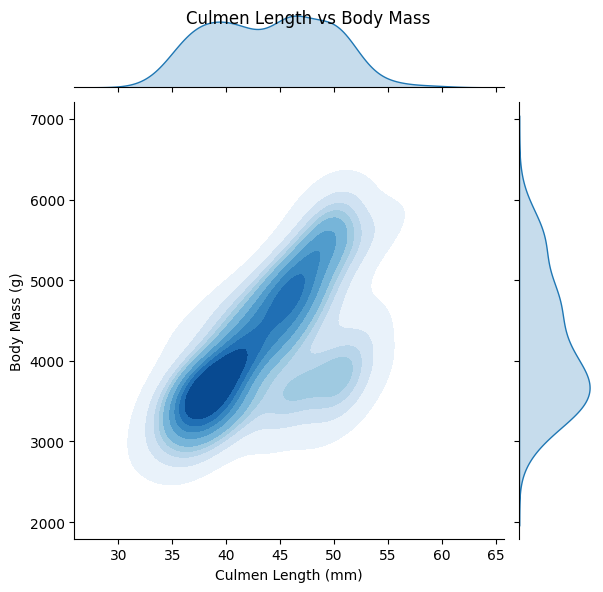

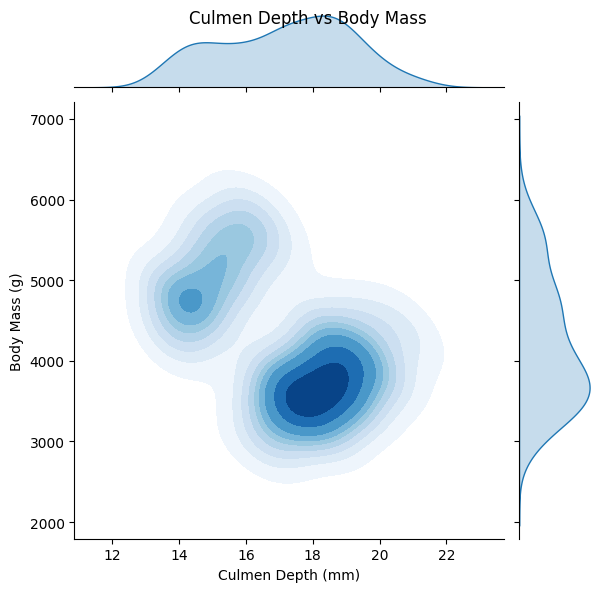

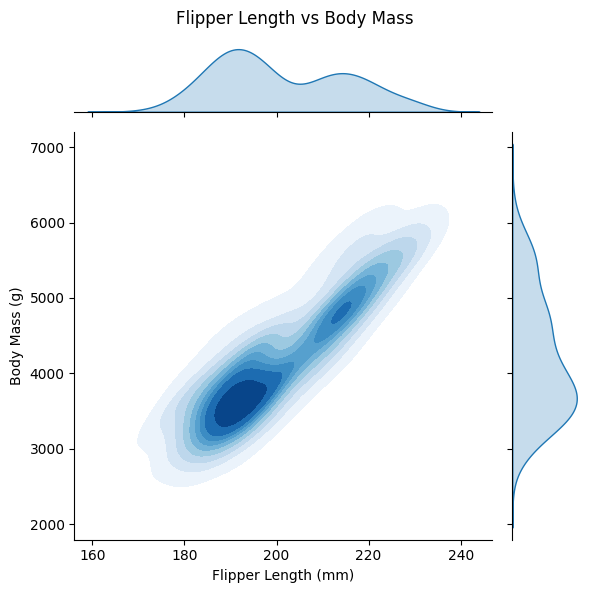

In [12]:
# Joint distribution of culmen depth, length, flipper length vs body mass

# Joint 1: Culmen Length vs Body Mass
sns.jointplot(
    x="Culmen Length (mm)", 
    y="Body Mass (g)", 
    data=df, 
    kind="kde", 
    fill=True, 
    cmap="Blues",
 
)
plt.suptitle("Culmen Length vs Body Mass")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")

# Joint 2: Culmen Depth vs Body Mass
sns.jointplot(
    x="Culmen Depth (mm)", 
    y="Body Mass (g)", 
    data=df, 
    kind="kde", 
    fill=True, 
    cmap="Blues",
    
)
plt.suptitle("Culmen Depth vs Body Mass")
plt.xlabel("Culmen Depth (mm)")
plt.ylabel("Body Mass (g)")

# Joint 3: Flipper Length vs Body Mass
sns.jointplot(
    x="Flipper Length (mm)", 
    y="Body Mass (g)", 
    data=df, 
    kind="kde", 
    fill=True, 
    cmap="Blues",
  
)
plt.suptitle("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Adjust layout
plt.tight_layout()
plt.show()



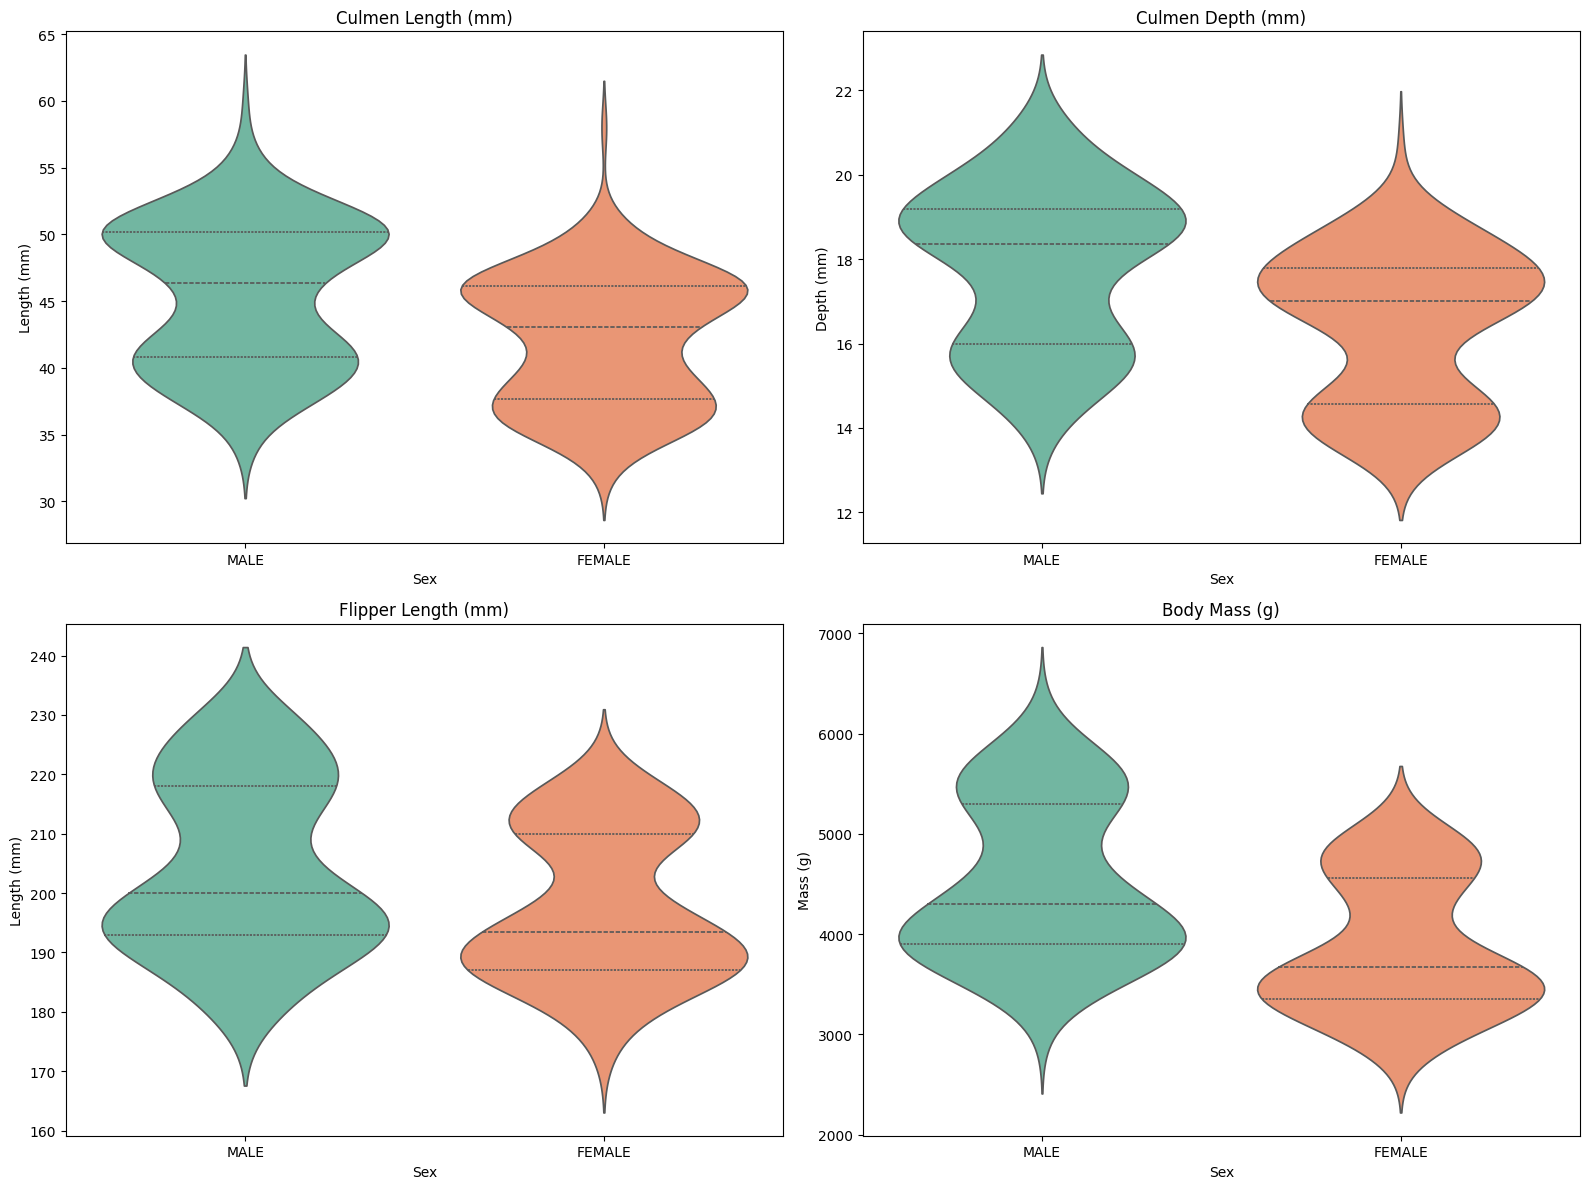

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Violin Plot 1: Culmen Length
sns.violinplot(
    x="Sex", 
    y="Culmen Length (mm)", 
    data=df, 
    ax=axes[0, 0], 
    palette="Set2", 
    inner="quart",
    hue='Sex',
    legend=False
)
axes[0, 0].set_title("Culmen Length (mm)")
axes[0, 0].set_xlabel("Sex")
axes[0, 0].set_ylabel("Length (mm)")

# Violin Plot 2: Culmen Depth
sns.violinplot(
    x="Sex", 
    y="Culmen Depth (mm)", 
    data=df, 
    ax=axes[0, 1], 
    palette="Set2", 
    inner="quart",
    hue='Sex',
    legend=False
)
axes[0, 1].set_title("Culmen Depth (mm)")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Depth (mm)")

# Violin Plot 3: Flipper Length
sns.violinplot(
    x="Sex", 
    y="Flipper Length (mm)", 
    data=df, 
    ax=axes[1, 0], 
    palette="Set2", 
    inner="quart",
    hue='Sex',
    legend=False
)
axes[1, 0].set_title("Flipper Length (mm)")
axes[1, 0].set_xlabel("Sex")
axes[1, 0].set_ylabel("Length (mm)")

# Violin Plot 4: Body Mass
sns.violinplot(
    x="Sex", 
    y="Body Mass (g)", 
    data=df, 
    ax=axes[1, 1], 
    palette="Set2", 
    inner="quart",
    hue='Sex',
    legend=False
)
axes[1, 1].set_title("Body Mass (g)")
axes[1, 1].set_xlabel("Sex")
axes[1, 1].set_ylabel("Mass (g)")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


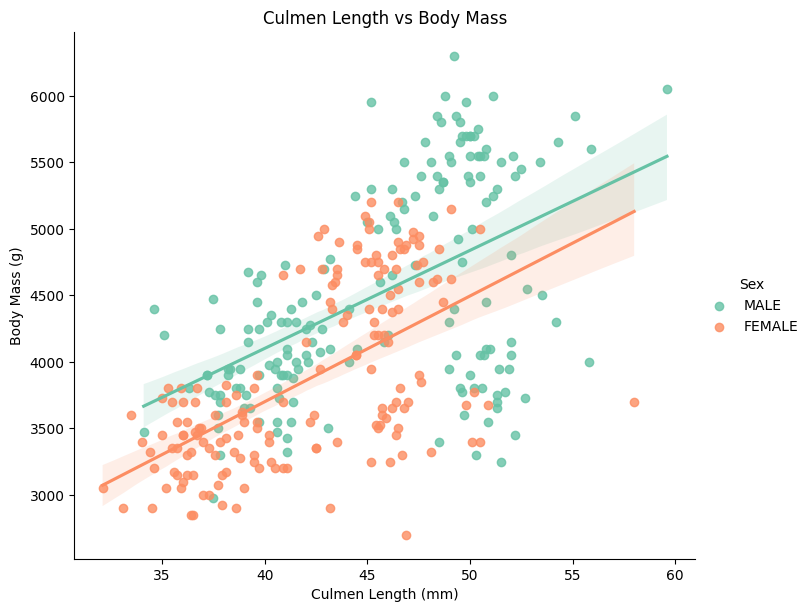

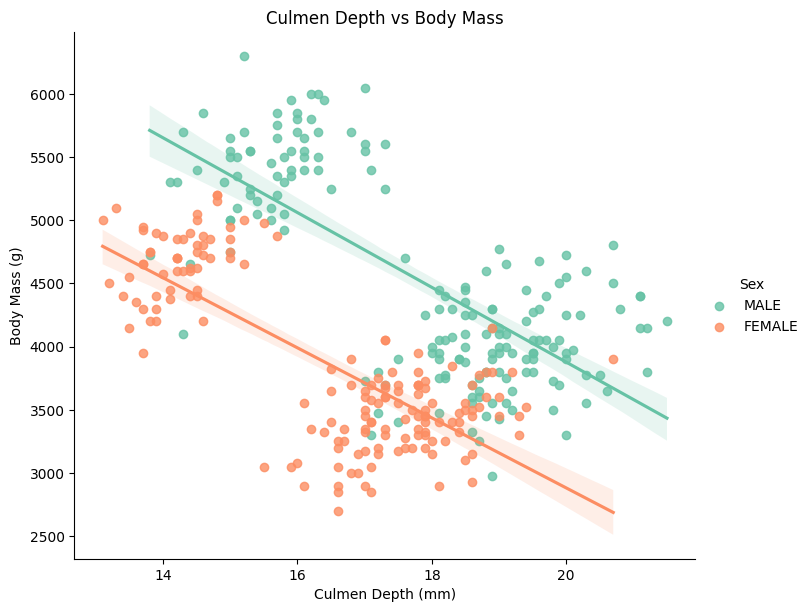

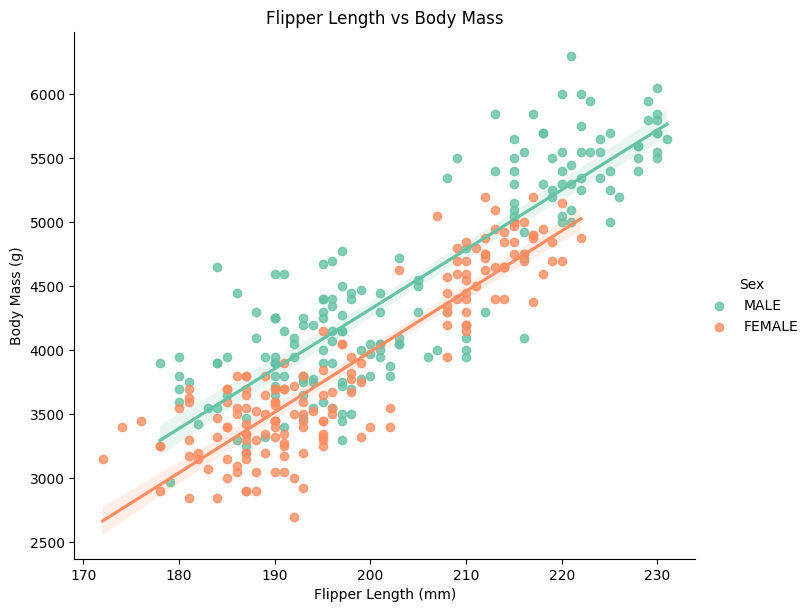

In [14]:
# Regression 1: Culmen Length vs Body Mass
sns.lmplot(
    data=df, 
    x="Culmen Length (mm)", 
    y="Body Mass (g)", 
    hue="Sex", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Culmen Length vs Body Mass")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

# Regression 2: Culmen Depth vs Body Mass
sns.lmplot(
    data=df, 
    x="Culmen Depth (mm)", 
    y="Body Mass (g)", 
    hue="Sex", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Culmen Depth vs Body Mass")
plt.xlabel("Culmen Depth (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

# Regression 3: Flipper Length vs Body Mass
sns.lmplot(
    data=df, 
    x="Flipper Length (mm)", 
    y="Body Mass (g)", 
    hue="Sex", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()


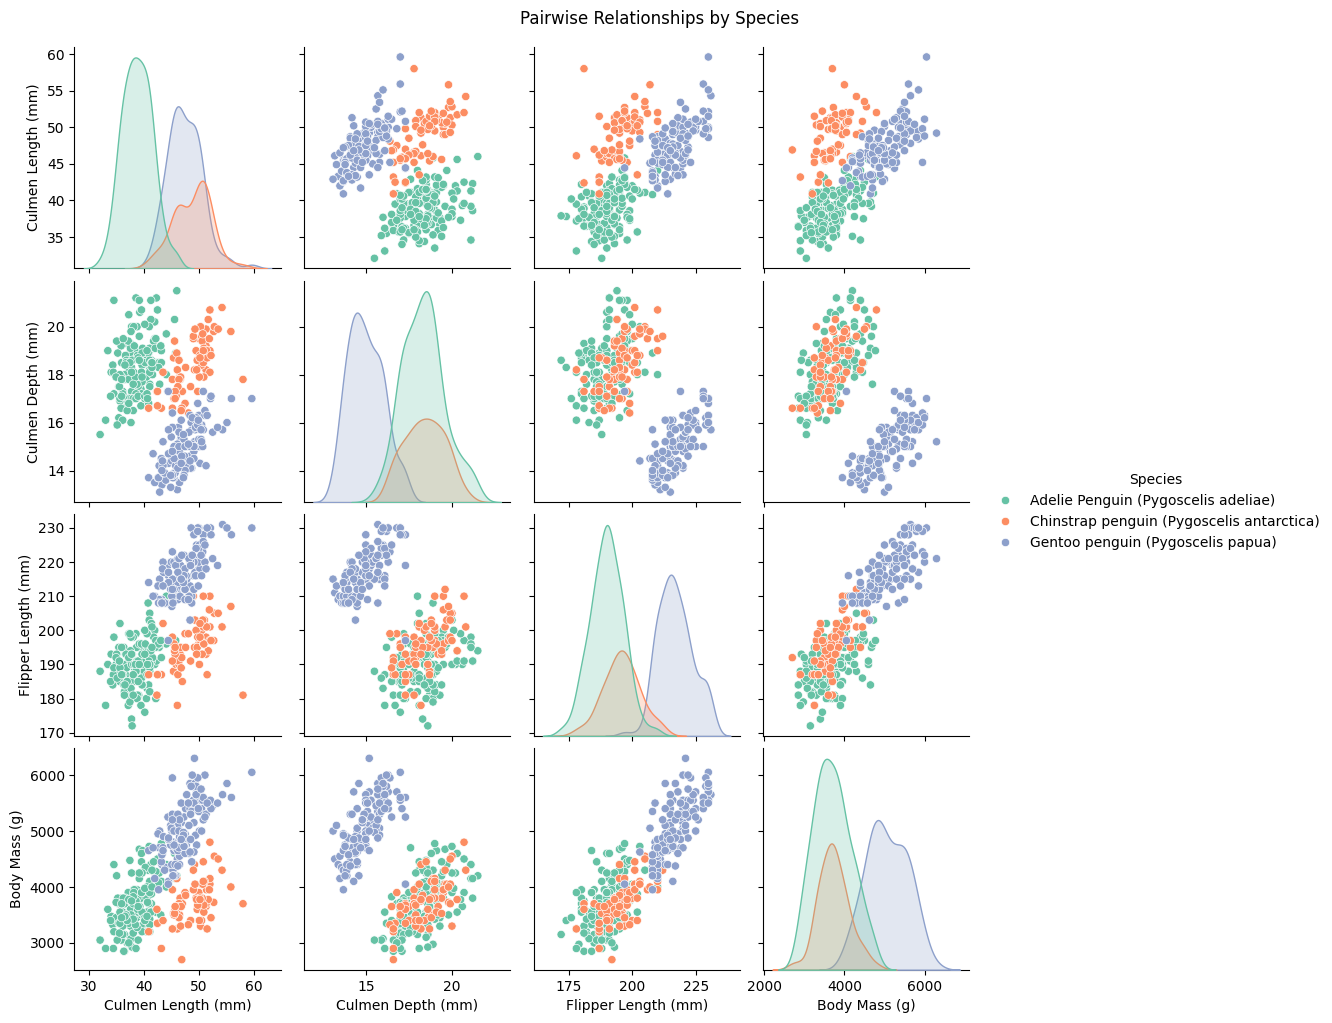

In [15]:
# Pairwaise relationships by species
sns.pairplot(
    df[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Species"]], 
    hue="Species", 
    diag_kind="kde", 
    palette="Set2"
)
plt.suptitle("Pairwise Relationships by Species", y=1.02)
plt.show()


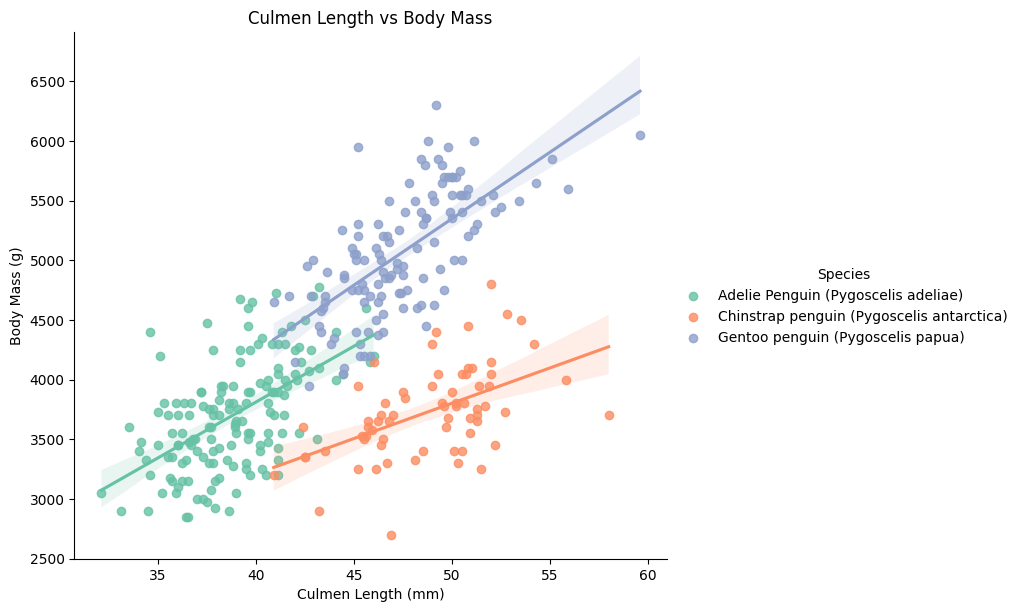

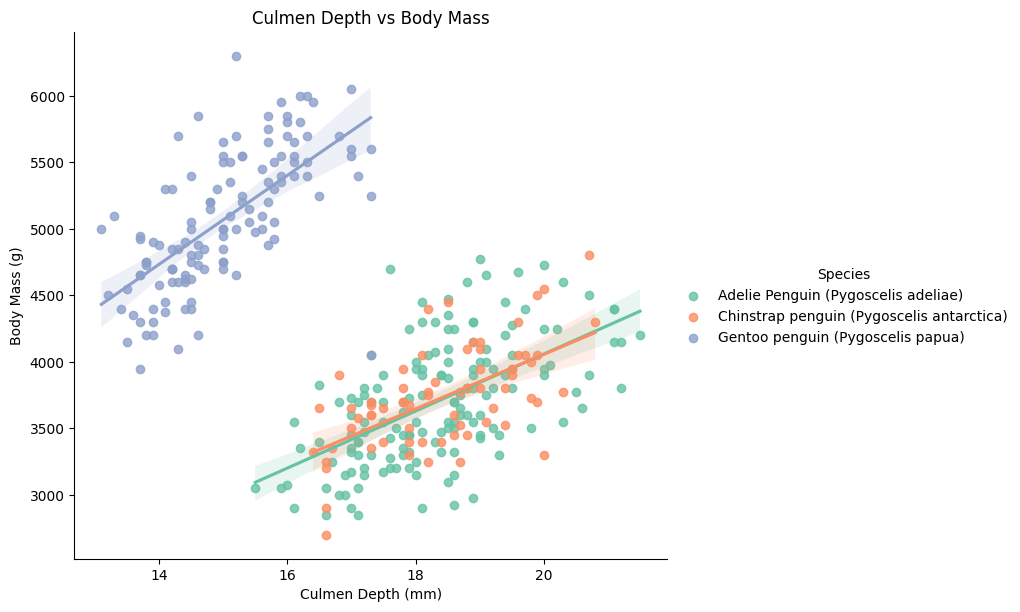

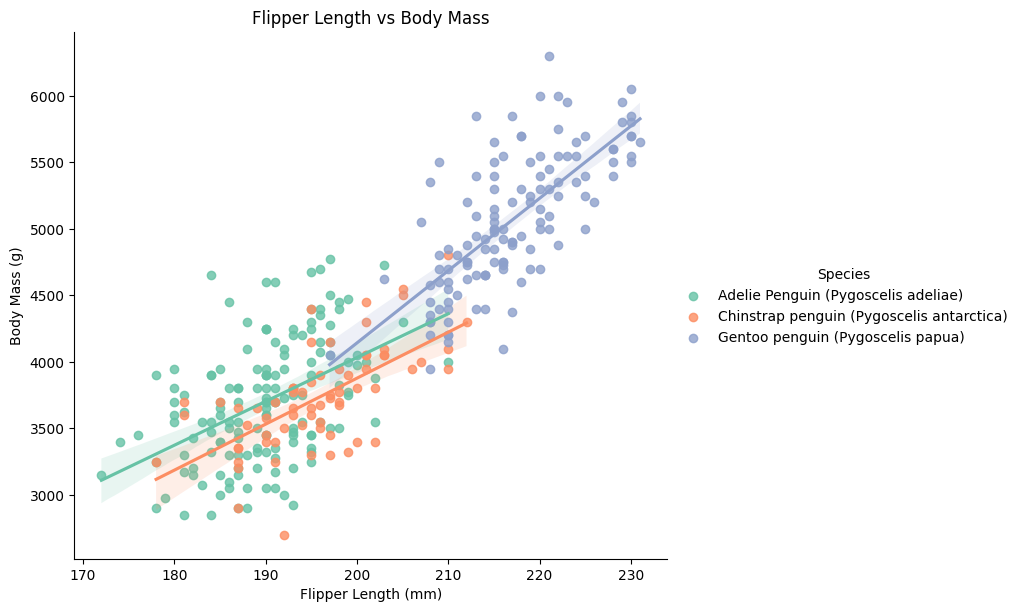

In [16]:
# Regression 1: Culmen Length vs Body Mass
sns.lmplot(
    data=df, 
    x="Culmen Length (mm)", 
    y="Body Mass (g)", 
    hue="Species", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Culmen Length vs Body Mass")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

# Regression 2: Culmen Depth vs Body Mass
sns.lmplot(
    data=df, 
    x="Culmen Depth (mm)", 
    y="Body Mass (g)", 
    hue="Species", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Culmen Depth vs Body Mass")
plt.xlabel("Culmen Depth (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

# Regression 3: Flipper Length vs Body Mass
sns.lmplot(
    data=df, 
    x="Flipper Length (mm)", 
    y="Body Mass (g)", 
    hue="Species", 
    palette="Set2", 
    height=6, 
    aspect=1.2
)
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

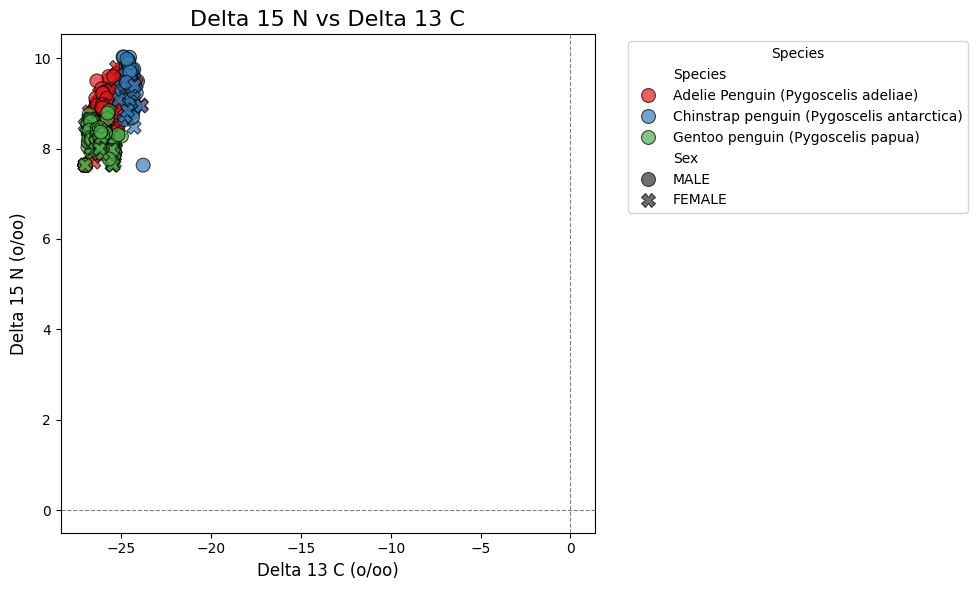

In [25]:
# Scatterplot of Delta 15 N vs Delta 13 C
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Delta 13 C (o/oo)", 
    y="Delta 15 N (o/oo)", 
    hue="Species",  
    style="Sex",   
    data=df, 
    palette="Set1",
    s=100,  
    edgecolor="black",
    alpha=0.7
)
plt.title("Delta 15 N vs Delta 13 C", fontsize=16)
plt.xlabel("Delta 13 C (o/oo)", fontsize=12)
plt.ylabel("Delta 15 N (o/oo)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Horizontal reference line
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Vertical reference line
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
